<a href="https://colab.research.google.com/github/thomasbinish/Computer-Vision/blob/master/Phi_3_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Libraries
2. Import Model
3. Import Processor
4. Prompt , import image
5. Infernece

In [1]:
!pip install numpy==1.24.4 Pillow==10.3.0 Requests==2.31.0 torch==2.3.0 torchvision==0.18.0 transformers==4.40.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.2/779.2 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/1

In [ ]:
!pip install accelerate

In [ ]:
!mkdir my_models
!mkdir my_models/phi_3_vision

mkdir: cannot create directory ‘my_models’: File exists
mkdir: cannot create directory ‘my_models/phi_3_vision’: File exists


# ***Import Phi-3-vision model***

In [ ]:
from transformers import AutoModelForCausalLM
model_id = "microsoft/Phi-3-vision-128k-instruct"

model = AutoModelForCausalLM.from_pretrained(model_id,
                                             cache_dir="/content/my_models/phi_3_vision",
                                             device_map="cuda",
                                             trust_remote_code=True,
                                             torch_dtype="auto",
                                             _attn_implementation="eager")



/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
model.config

Phi3VConfig {
  "_name_or_path": "microsoft/Phi-3-vision-128k-instruct",
  "architectures": [
    "Phi3VForCausalLM"
  ],
  "attention_dropout": 0.0,
  "auto_map": {
    "AutoConfig": "microsoft/Phi-3-vision-128k-instruct--configuration_phi3_v.Phi3VConfig",
    "AutoModelForCausalLM": "microsoft/Phi-3-vision-128k-instruct--modeling_phi3_v.Phi3VForCausalLM"
  },
  "bos_token_id": 1,
  "embd_layer": {
    "embedding_cls": "image",
    "hd_transform_order": "sub_glb",
    "projection_cls": "mlp",
    "use_hd_transform": true,
    "with_learnable_separator": true
  },
  "embd_pdrop": 0.0,
  "eos_token_id": 2,
  "hidden_act": "silu",
  "hidden_size": 3072,
  "img_processor": {
    "image_dim_out": 1024,
    "model_name": "openai/clip-vit-large-patch14-336",
    "name": "clip_vision_model",
    "num_img_tokens": 144
  },
  "initializer_range": 0.02,
  "intermediate_size": 8192,
  "max_position_embeddings": 131072,
  "model_type": "phi3_v",
  "num_attention_heads": 32,
  "num_hidden_layers": 

In [ ]:
from transformers import AutoProcessor
processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/464 [00:00<?, ?B/s]

processing_phi3_v.py:   0%|          | 0.00/11.3k [00:00<?, ?B/s]

image_processing_phi3_v.py:   0%|          | 0.00/11.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-vision-128k-instruct:
- image_processing_phi3_v.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-vision-128k-instruct:
- processing_phi3_v.py
- image_processing_phi3_v.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_config.json:   0%|          | 0.00/9.40k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.85M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/670 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
print(processor.__doc__)


    Constructs a Phi3-V processor which wraps a Phi3-V image processor and a LLaMa tokenizer into a single processor.

    [`Phi3VProcessor`] offers all the functionalities of [`Phi3VImageProcessor`] and [`LlamaTokenizerFast`]. See the
    [`~Phi3VProcessor.__call__`] and [`~Phi3VProcessor.decode`] for more information.

    Args:
        image_processor ([`Phi3VImageProcessor`], *optional*):
            The image processor is a required input.
        tokenizer ([`LlamaTokenizerFast`], *optional*):
            The tokenizer is a required input.
    


# Create Prompt

In [ ]:
messages = [
    {"role": "user", "content": "<|image_1|>\nProvide OCR for all the text in given image in markdown format."}
]

prompt = processor.tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

In [ ]:
prompt

'<|user|>\n<|image_1|>\nProvide OCR for all the text in given image in markdown format.<|end|>\n<|assistant|>\n'

# Fetch Input Image

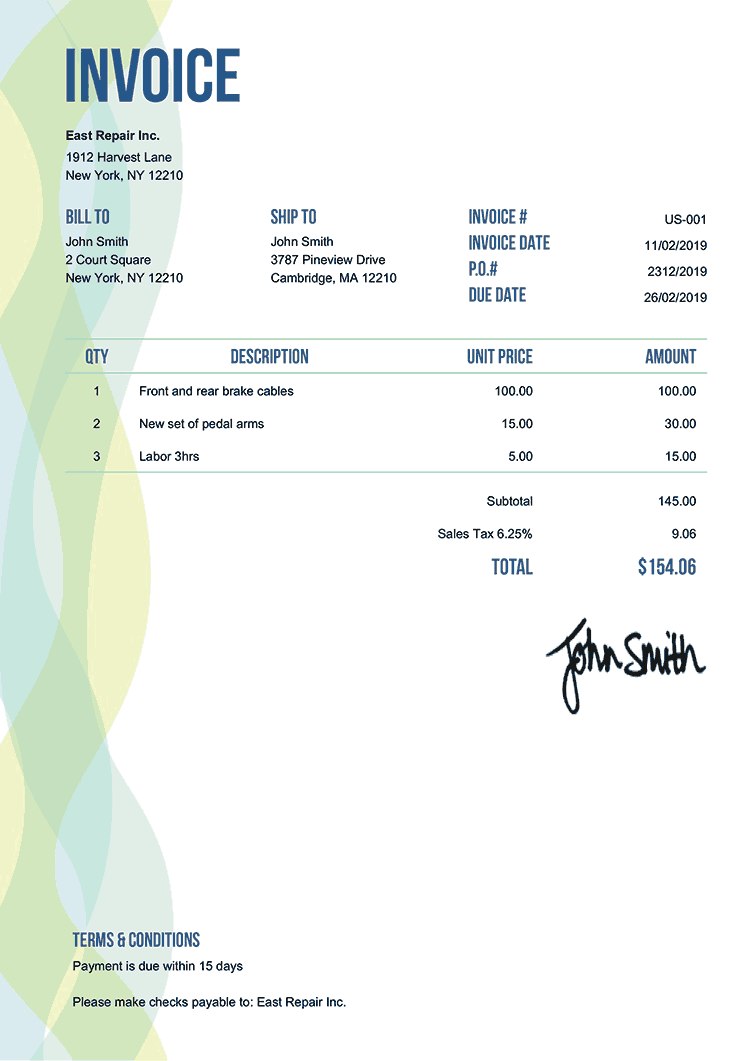

In [ ]:
from PIL import Image
import requests


url = "https://templates.invoicehome.com/invoice-template-us-dexter-750px.png"
image = Image.open(requests.get(url, stream=True).raw)
image


In [ ]:
inputs = processor(prompt, [image], return_tensors="pt").to("cuda:0")

In [ ]:
inputs

{'input_ids': tensor([[    1, 32010, 29871,  ..., 29871,    13, 32001]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1]], device='cuda:0'), 'pixel_values': tensor([[[[[1.9303, 1.9303, 1.9303,  ..., 1.9303, 1.9303, 1.9303],
           [1.9303, 1.9303, 1.9303,  ..., 1.9303, 1.9303, 1.9303],
           [1.9303, 1.9303, 1.9303,  ..., 1.9303, 1.9303, 1.9303],
           ...,
           [1.9303, 1.9303, 1.9303,  ..., 1.9303, 1.9303, 1.9303],
           [1.9303, 1.9303, 1.9303,  ..., 1.9303, 1.9303, 1.9303],
           [1.9303, 1.9303, 1.9303,  ..., 1.9303, 1.9303, 1.9303]],

          [[2.0749, 2.0749, 2.0749,  ..., 2.0749, 2.0749, 2.0749],
           [2.0749, 2.0749, 2.0749,  ..., 2.0749, 2.0749, 2.0749],
           [2.0749, 2.0749, 2.0749,  ..., 2.0749, 2.0749, 2.0749],
           ...,
           [2.0749, 2.0749, 2.0749,  ..., 2.0749, 2.0749, 2.0749],
           [2.0749, 2.0749, 2.0749,  ..., 2.0749, 2.0749, 2.0749],
           [2.0749, 2.0749, 2.0749,  ..., 2.0749, 2

In [ ]:
generation_args = {
    "max_new_tokens": 500,
    "temperature": 0.0,
    "do_sample": False,
}

# Inference

In [ ]:
%%time
generate_ids = model.generate(**inputs, eos_token_id=processor.tokenizer.eos_token_id, **generation_args)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:492: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


CPU times: user 44.5 s, sys: 344 ms, total: 44.8 s
Wall time: 50.6 s


In [ ]:
# remove input tokens
generate_ids = generate_ids[:, inputs['input_ids'].shape[1]:]
response = processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]

print(response)

Certainly! Below is the markdown table converted from the image provided:

```markdown
| QTY | DESCRIPTION            | UNIT PRICE | AMOUNT |
|-----|------------------------|------------|--------|
| 1   | Front and rear brake cables | 100.00     | 100.00 |
| 2   | New set of pedal arms  | 15.00      | 30.00  |
| 3   | Labor 3hrs             | 5.00       | 15.00  |
|     | **Subtotal**           |            | 145.00 |
|     | Sales Tax 6.25%        |            | 9.06   |
|     | **TOTAL**              |            | $154.06|
```

Additionally, the image contains the following information:

- **INVOICE**
- **BILL TO**: John Smith
- **SHIP TO**: John Smith
- **INVOICE #**: US-001
- **INVOICE DATE**: 11/02/2019
- **P.O. #**: 2312/2019
- **DUE DATE**: 26/02/2019
- **TERMS & CONDITIONS**: Payment is due within 15 days. Please make checks payable to: East Repair Inc.

The invoice is from East Repair Inc., located at 1912 Harvest Lane, New York, NY 12210. The invoice number is US-001, and th